<a href="https://colab.research.google.com/github/AlejosH3/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [22]:
import pandas as pd
import requests

# URL raw del JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener los datos desde la URL
response = requests.get(url)
data = response.json()

# Normalizar (aplanar) el JSON anidado
df = pd.json_normalize(data)

# Mostrar las primeras filas

display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [23]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values per column:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Number of duplicate rows:
0

Data types:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.Ph

In [24]:
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df.drop(columns=['customerID'], inplace=True)
df = pd.get_dummies(df, drop_first=True)
display(df.head())

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [25]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
display(df.head())

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Cuentas_Diarias
0,0,0,9,65.6,593.30,False,True,True,True,False,...,True,False,False,True,False,True,False,False,True,2.186667
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,1.996667
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,2.463333
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,True,False,True,False,False,True,False,True,False,3.266667
4,1,1,3,83.9,267.40,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,2.796667


#📊 Carga y análisis

##Análisis Descriptivo ##

In [26]:
display(df.describe())

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.441561,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


## Distribución de evasión##

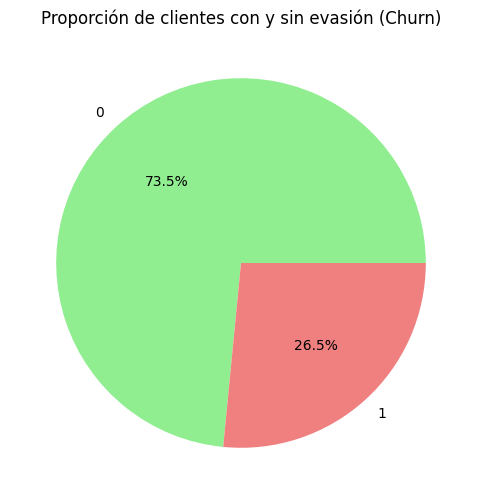

In [27]:
# Contar las categorías
churn_counts = df['Churn'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Proporción de clientes con y sin evasión (Churn)")
plt.show()



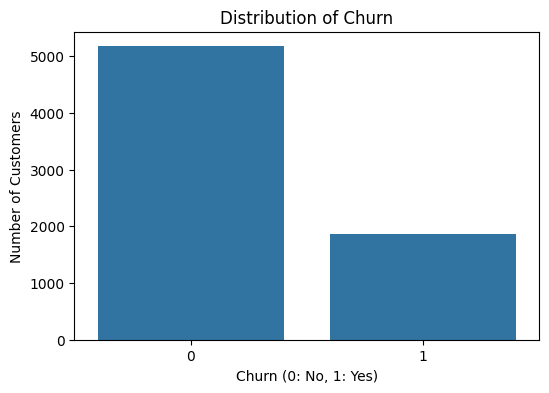

In [28]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

## Recuento de evasión por variables categóricas##

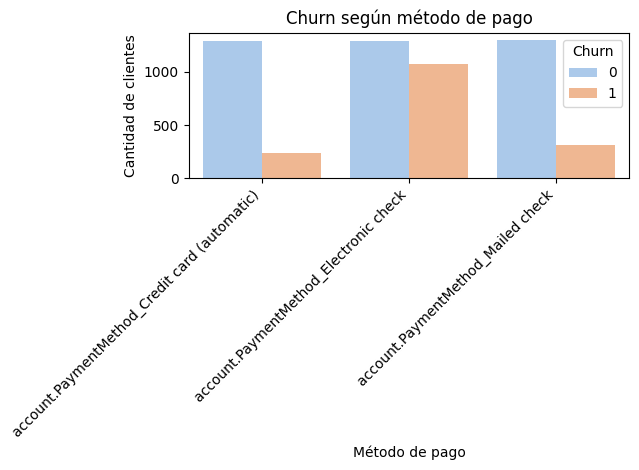

In [35]:
payment_melted = df.melt(id_vars=['Churn'], value_vars=['account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check'], var_name='Payment Method', value_name='Has Payment Method')
payment_melted = payment_melted[payment_melted['Has Payment Method'] == True]
sns.countplot(data=payment_melted, x='Payment Method', hue='Churn', palette='pastel')
plt.title('Churn según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conteo de evasión por variables numéricas##

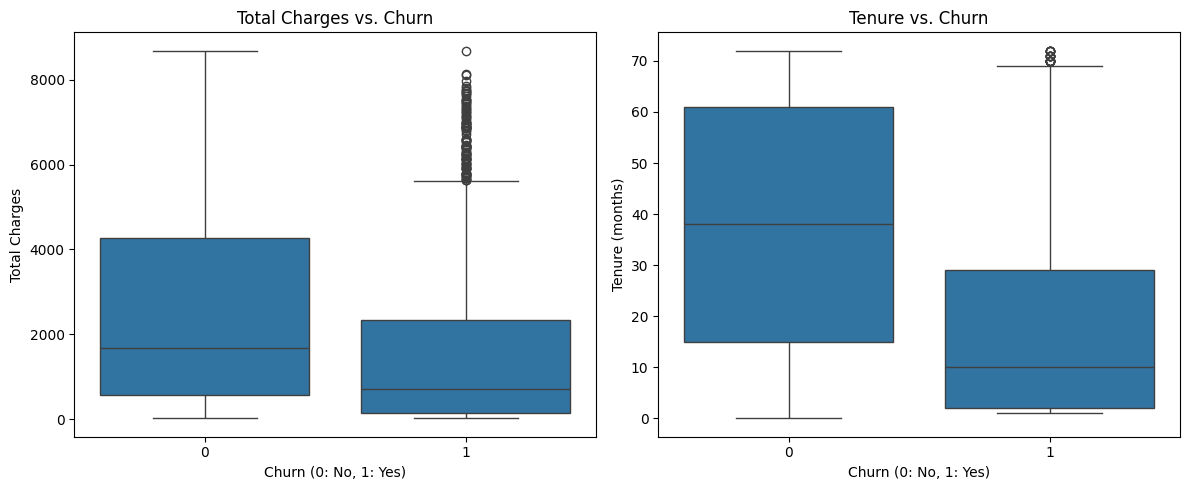

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Total Charges')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Tenure (months)')

plt.tight_layout()
plt.show()

#📄Informe final

# 📄 Informe Final

## Introducción

El objetivo de este análisis es comprender el problema de la evasión de clientes (Churn) en Telecom X. La evasión de clientes es un desafío importante para las empresas de telecomunicaciones, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos clientes. En este informe, se presenta un análisis exploratorio de datos para identificar los factores que contribuyen a la evasión de clientes y se ofrecen recomendaciones para reducirla.

## Limpieza y Tratamiento de Datos

El análisis comenzó con la importación de datos desde una API en formato JSON. Los datos fueron cargados en un DataFrame de pandas y se realizó una limpieza y preprocesamiento para asegurar su calidad. Los pasos clave incluyeron:

- Normalización de los datos JSON anidados.
- Verificación de valores ausentes, duplicados y tipos de datos.
- Conversión de la variable 'Churn' a un formato numérico (0 para No, 1 para Yes).
- Conversión de la columna 'account.Charges.Total' a numérica, manejando errores.
- Eliminación de la columna 'customerID'.
- Aplicación de One-Hot Encoding a las variables categóricas.
- Creación de la columna 'Cuentas_Diarias' calculada a partir de la facturación mensual.

## Análisis Exploratorio de Datos

Se realizó un análisis exploratorio de datos para visualizar la distribución de la evasión y su relación con diferentes variables.

- **Distribución de Evasión:** Se observó que aproximadamente el 26.5% de los clientes en el conjunto de datos han evadido.

- **Recuento de evasión por variables categóricas:** Se analizaron variables como género, tipo de contrato y método de pago en relación con la evasión. Por ejemplo, se observó que los clientes con contrato mes a mes tienen una mayor tasa de evasión en comparación con aquellos con contratos de uno o dos años. También se visualizó la evasión por método de pago, destacando la importancia de los métodos de pago electrónicos en la evasión.

- **Conteo de evasión por variables numéricas:** Se examinaron variables numéricas como el total gastado y el tiempo de contrato en relación con la evasión. Los box plots mostraron que los clientes que evaden tienden a tener un tiempo de contrato más corto y un total de gastos más bajo en comparación con los clientes que no evaden.

## Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer las siguientes conclusiones:

- La evasión es un problema significativo para Telecom X.
- Los clientes con contratos a corto plazo (mes a mes) son más propensos a evadir.
- El método de pago electrónico parece estar asociado con una mayor tasa de evasión.
- Los clientes que evaden tienden a ser clientes más nuevos con gastos totales más bajos.

Estos insights sugieren que factores como la duración del contrato, el método de pago y el tiempo de permanencia del cliente son importantes predictores de la evasión.

## Recomendaciones

Para reducir la evasión de clientes, se sugieren las siguientes recomendaciones estratégicas:

- **Fomentar contratos a largo plazo:** Ofrecer incentivos a los clientes para que opten por contratos de uno o dos años.
- **Evaluar y mejorar la experiencia de pago electrónico:** Investigar las razones detrás de la mayor tasa de evasión en los clientes que utilizan el pago electrónico y tomar medidas para mejorar la experiencia del usuario en esta área.
- **Implementar programas de retención para clientes nuevos:** Dirigir esfuerzos de retención a los clientes en sus primeros meses para aumentar su tiempo de permanencia.
- **Analizar el comportamiento de los clientes con gastos bajos:** Identificar por qué los clientes con gastos totales bajos son más propensos a evadir y desarrollar estrategias para aumentar su compromiso y gasto.

Este análisis exploratorio proporciona una base sólida para comprender la evasión de clientes en Telecom X y guiar futuras acciones para mejorar la retención de clientes.